In [1]:
import torch 
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms, datasets
import numpy as numpy
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import torchvision.models as models

tensor([[[[0.4196, 0.4196, 0.4196,  ..., 0.4392, 0.4392, 0.4392],
          [0.4196, 0.4196, 0.4196,  ..., 0.4392, 0.4392, 0.4392],
          [0.4196, 0.4196, 0.4196,  ..., 0.4392, 0.4392, 0.4392],
          ...,
          [0.0431, 0.0431, 0.0431,  ..., 0.0431, 0.0431, 0.0431],
          [0.0431, 0.0431, 0.0431,  ..., 0.0431, 0.0431, 0.0431],
          [0.0431, 0.0431, 0.0431,  ..., 0.0431, 0.0431, 0.0431]],

         [[0.6941, 0.6941, 0.6941,  ..., 0.4000, 0.4000, 0.4000],
          [0.6941, 0.6941, 0.6941,  ..., 0.4000, 0.4000, 0.4000],
          [0.6941, 0.6941, 0.6941,  ..., 0.4000, 0.4000, 0.4000],
          ...,
          [0.0627, 0.0627, 0.0627,  ..., 0.0510, 0.0510, 0.0510],
          [0.0627, 0.0627, 0.0627,  ..., 0.0510, 0.0510, 0.0510],
          [0.0627, 0.0627, 0.0627,  ..., 0.0510, 0.0510, 0.0510]],

         [[0.9373, 0.9373, 0.9373,  ..., 0.4353, 0.4353, 0.4353],
          [0.9373, 0.9373, 0.9373,  ..., 0.4353, 0.4353, 0.4353],
          [0.9373, 0.9373, 0.9373,  ..., 0

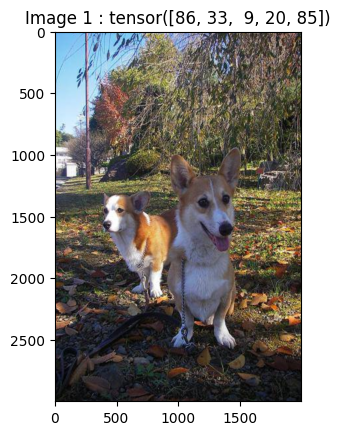

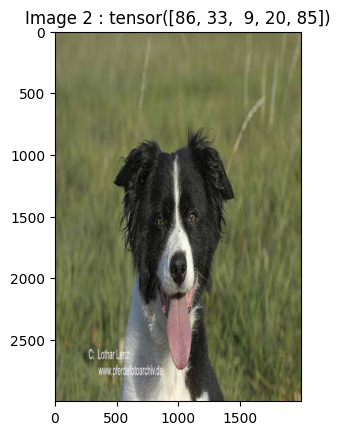

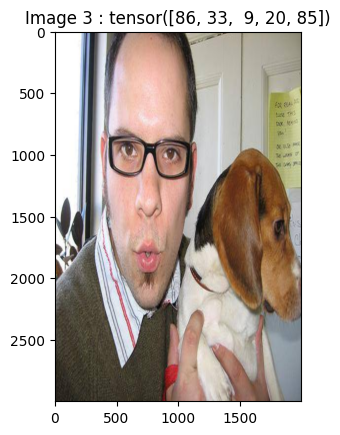

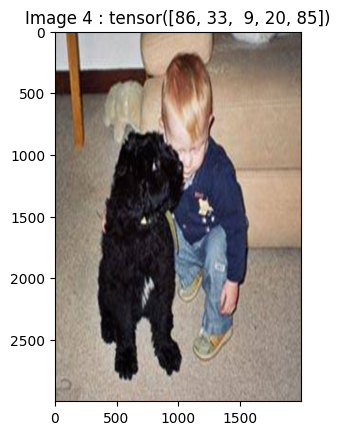

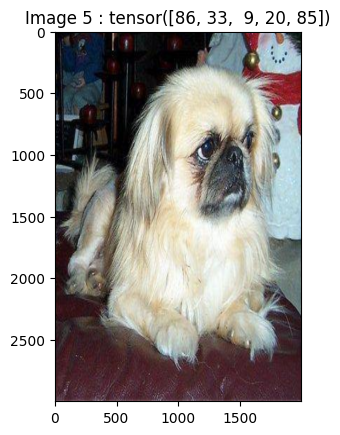

In [2]:
# Define the transformation to be applied to each image
# x=(x-mean)/std
transform = transforms.Compose([
    transforms.Resize((3000,2000)),
    transforms.ToTensor(),
    # transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5)),
    # transforms.Lambda(lambda x: x * 255.0)

])

# Load the images from the folder
dataset = datasets.ImageFolder('./ImageByClasses', transform=transform)

BATCH_SIZE=5
# Create a data loader to load the images in batches
data_loader = torch.utils.data.DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)

# Iterate over the data loader to get the tensors
for images, labels in data_loader:
    # Do something with the tensors
    print(images)
    print(images.shape)
    
    # Convert the tensor to NumPy array
    images_np = images.numpy()

    # Iterate through each image in the batch
    for i in range(images_np.shape[0]):
        # Extract the current image from the batch
        current_image = images_np[i, :, :, :]

        # Transpose the dimensions to match the order expected by matplotlib (H x W x C)
        current_image = current_image.transpose(1, 2, 0)

        # Display the image using matplotlib
        plt.imshow(current_image)
        plt.title(f"Image {i + 1} : {labels}")
        plt.show()
    break


In [3]:
import torch.nn as nn
import torch.nn.functional as F

In [4]:

class Dog(nn.Module):
    def __init__(self,num_classes=120):
        super(Dog, self).__init__()
        self.vgg16 = models.vgg16(pretrained=True)  # Cargar el modelo VGG-16 preentrenado
        # Congelar las capas para que los pesos no se actualicen durante el entrenamiento
        for param in self.vgg16.parameters():
            param.requires_grad = False
        # Modificar la última capa para adaptarse al número de clases
        in_features = self.vgg16.classifier[6].in_features
        self.vgg16.classifier[6] = nn.Linear(in_features, num_classes)

    def forward(self, x):
        return self.vgg16(x)




In [5]:
num_classes = 120
num_epochs = 20
batch_size = 16
learning_rate = 0.005
model = Dog(num_classes)

c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [6]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay = 0.005, momentum = 0.9)  


# Train the model
total_step = len(data_loader)

In [ ]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(data_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')